## Amazon Rekognition

Amazon Rekognition es un servicio que permite añadir análisis de imágenes y de video fácilmente a nuestras aplicaciones. Los usuarios pueden consumirlo a través de la Amazon Rekognition API, enviar sus imágenes o videos, y recibir como respuesta la identificación de rostros, objetos, escenas, entre otros.

Amazon Rekognition está basado en la misma tecnología que emplea Amazon para el análisis de billones de imágenes y videos diariamente. No requiere experiencia previa en Machine Learning para poder utilizarse. 

En este notebook iremos recorriendo las diferentes acciones que se pueden emplear para el análisis de imágenes.

1. [Compare Faces](#compare_faces)
2. [Detect Faces](#detect_faces)
3. [Detect Labels](#detect_labels)
4. [Detect Moderation Labels](#detect_moderation_labels)
5. [Detect Protective Equipment](#detect_protective_equipment)
6. [Detect Text](#detect_text)
7. [Recognize Celebrities](#recognize_celebrities)
8. [Index Faces y Search Faces by Image](#index_faces)

In [98]:
import boto3
import sagemaker
import numpy as np
from matplotlib import pyplot as plt
import cv2
import json
from PIL import Image, ImageDraw, ExifTags, ImageColor, ImageFont
import io

rekognition = boto3.client("rekognition", region_name='us-east-1')
role = sagemaker.get_execution_role()
iam = boto3.client('iam')

## 1. Compare Faces <a id='compare_faces'></a>
Compara un rostro en la imagen *fuente* con cada una de los 100 rostros más grandes encontrados en la imagen *objetivo*.

In [56]:
img1 = cv2.imread('./img/compare_faces_1.jpg',1);

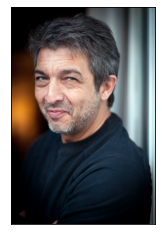

In [15]:
imgrgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb);
plt.xticks([]),plt.yticks([])
plt.show();

In [16]:
with open('./img/compare_faces_1.jpg', 'rb') as document:
    imageBytes1 = bytearray(document.read())

In [17]:
with open('./img/compare_faces_2.jpg', 'rb') as document:
    imageBytes2 = bytearray(document.read())

In [20]:
response = rekognition.compare_faces(
    SourceImage={
        'Bytes': imageBytes1,
    },
    TargetImage={
        'Bytes': imageBytes2,
    }
)

In [21]:
response

{'SourceImageFace': {'BoundingBox': {'Width': 0.4477143883705139,
   'Height': 0.4046041965484619,
   'Left': 0.1546526700258255,
   'Top': 0.17784035205841064},
  'Confidence': 99.9996566772461},
 'FaceMatches': [{'Similarity': 99.99723815917969,
   'Face': {'BoundingBox': {'Width': 0.1796404868364334,
     'Height': 0.4266570806503296,
     'Left': 0.2670557200908661,
     'Top': 0.1447373330593109},
    'Confidence': 99.99974060058594,
    'Landmarks': [{'Type': 'eyeLeft',
      'X': 0.3266843855381012,
      'Y': 0.2904547154903412},
     {'Type': 'eyeRight', 'X': 0.4054647386074066, 'Y': 0.3004623055458069},
     {'Type': 'mouthLeft', 'X': 0.3280794620513916, 'Y': 0.4444158673286438},
     {'Type': 'mouthRight', 'X': 0.39379769563674927, 'Y': 0.4525052309036255},
     {'Type': 'nose', 'X': 0.37241125106811523, 'Y': 0.36843860149383545}],
    'Pose': {'Roll': 5.442287921905518,
     'Yaw': 8.97868537902832,
     'Pitch': 8.865127563476562},
    'Quality': {'Brightness': 84.80329895

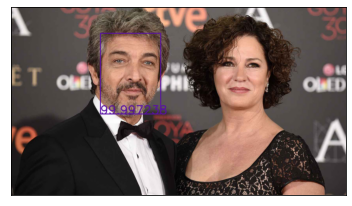

In [57]:
img2 = cv2.imread('./img/compare_faces_2.jpg',1);
img_color_size = img2.shape
font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(0,len(response['FaceMatches'])):
    boundRect = response['FaceMatches'][i]['Face']['BoundingBox']
    r,g,b = [int(np.random.uniform(0,255)), int(np.random.uniform(0,255)),int(np.random.uniform(0,255))]
    cv2.rectangle(img2,(int(boundRect["Left"]*img_color_size[1]),\
    int((boundRect["Top"]+boundRect["Height"])*img_color_size[0])),\
    (int((boundRect["Left"]+boundRect["Width"])*img_color_size[1]),\
    int((boundRect["Top"]*img_color_size[0]))),(r,g,b),3)

    if i == 0:
        cv2.putText(img2, "{:.6f}".format(response['FaceMatches'][i]['Similarity']), (int((boundRect["Left"])*img_color_size[1]), int((boundRect["Top"]+boundRect["Height"])*img_color_size[0])), font, 2, (r,g,b), 4, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB));
plt.xticks([]),plt.yticks([])
plt.show();

## 1. Detect Faces <a id='detect_faces'></a>
Detecta los 100 rostros más grandes en una imagen. Por cada uno de los rostros, la operación regresa detalles del rostro. Estos detalles incluyen una bounding box del rostro, un valor de confianza (de que la bounding box contiene un rostro) y un set de atributos como presencia de barba, lentes de sol, etc.

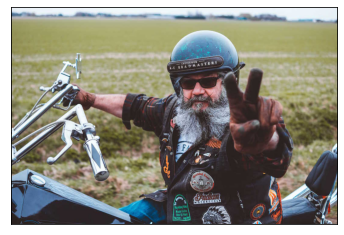

In [58]:
img1 = cv2.imread('./img/detect_faces_1.jpg',1);
imgrgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb);
plt.xticks([]),plt.yticks([])
plt.show();

In [59]:
with open('./img/detect_faces_1.jpg', 'rb') as document:
    imageBytes1 = bytearray(document.read())

In [62]:
response = rekognition.detect_faces(
    Image={
        'Bytes': imageBytes1,
    },
    Attributes=[
        'ALL'
    ]
)

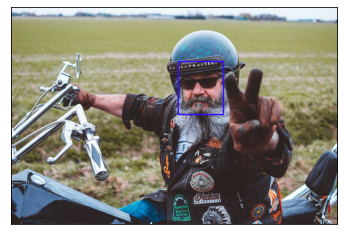

In [68]:
img = cv2.imread('./img/detect_faces_1.jpg',1);
img_color_size = img.shape
font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(0,len(response['FaceDetails'])):
    boundRect = response['FaceDetails'][i]['BoundingBox']
    r,g,b = [int(np.random.uniform(0,255)), int(np.random.uniform(0,255)),int(np.random.uniform(0,255))]
    cv2.rectangle(img,(int(boundRect["Left"]*img_color_size[1]),\
    int((boundRect["Top"]+boundRect["Height"])*img_color_size[0])),\
    (int((boundRect["Left"]+boundRect["Width"])*img_color_size[1]),\
    int((boundRect["Top"]*img_color_size[0]))),(r,g,b),3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.xticks([]),plt.yticks([])
plt.show();

In [63]:
response

{'FaceDetails': [{'BoundingBox': {'Width': 0.13785552978515625,
    'Height': 0.24315176904201508,
    'Left': 0.5114786028862,
    'Top': 0.2551465630531311},
   'AgeRange': {'Low': 45, 'High': 53},
   'Smile': {'Value': False, 'Confidence': 91.42808532714844},
   'Eyeglasses': {'Value': True, 'Confidence': 99.99999237060547},
   'Sunglasses': {'Value': True, 'Confidence': 99.89913177490234},
   'Gender': {'Value': 'Male', 'Confidence': 99.95003509521484},
   'Beard': {'Value': True, 'Confidence': 99.6754379272461},
   'Mustache': {'Value': False, 'Confidence': 61.92688751220703},
   'EyesOpen': {'Value': True, 'Confidence': 98.76634216308594},
   'MouthOpen': {'Value': False, 'Confidence': 91.1365737915039},
   'Emotions': [{'Type': 'CALM', 'Confidence': 89.8797378540039},
    {'Type': 'HAPPY', 'Confidence': 8.749408721923828},
    {'Type': 'SURPRISED', 'Confidence': 6.334299087524414},
    {'Type': 'FEAR', 'Confidence': 5.910007953643799},
    {'Type': 'SAD', 'Confidence': 2.2377996

## Detect Labels <a id='detect_labels'></a>
Detecta instancias de entidades del mundo real dentro de una imagen (JPEG o PNG) proporcionada como entrada. Esto incluye objetos como flores, árboles y mesas; eventos como bodas, graduaciones y fiestas de cumpleaños; y conceptos como paisaje, atardecer y naturaleza.

In [69]:
with open('./img/detect_labels_1.jpg', 'rb') as document:
    imageBytes1 = bytearray(document.read())

In [70]:
response = rekognition.detect_labels(
    Image={
        'Bytes': imageBytes1,
    },
    MinConfidence=75
)

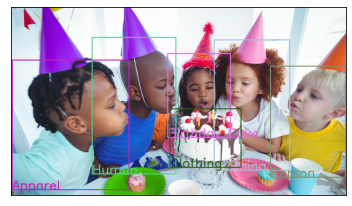

In [75]:
img = cv2.imread('./img/detect_labels_1.jpg',1);
img_color_size = img.shape
font = cv2.FONT_HERSHEY_SIMPLEX

for j in range(0,len(response['Labels'])):
    for i in range(0, len(response['Labels'][j]['Instances'])):
        boundRect = response['Labels'][j]['Instances'][i]['BoundingBox']
        if(boundRect):
            r,g,b = [int(np.random.uniform(0,255)), int(np.random.uniform(0,255)),int(np.random.uniform(0,255))]
            cv2.rectangle(img,(int(boundRect["Left"]*img_color_size[1]),\
            int((boundRect["Top"]+boundRect["Height"])*img_color_size[0])),\
            (int((boundRect["Left"]+boundRect["Width"])*img_color_size[1]),\
            int((boundRect["Top"]*img_color_size[0]))),(r,g,b),3)
            
            cv2.putText(img, response['Labels'][i]['Name'], (int((boundRect["Left"])*img_color_size[1]), int((boundRect["Top"]+boundRect["Height"])*img_color_size[0])), font, 2, (r,g,b), 4, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.xticks([]),plt.yticks([])
plt.show();

In [71]:
response

{'Labels': [{'Name': 'Clothing',
   'Confidence': 99.68207550048828,
   'Instances': [],
   'Parents': []},
  {'Name': 'Apparel',
   'Confidence': 99.68207550048828,
   'Instances': [],
   'Parents': []},
  {'Name': 'Person',
   'Confidence': 99.21955871582031,
   'Instances': [{'BoundingBox': {'Width': 0.22571155428886414,
      'Height': 0.6909430623054504,
      'Left': 0.6063672304153442,
      'Top': 0.17899881303310394},
     'Confidence': 99.21955871582031},
    {'BoundingBox': {'Width': 0.34827080368995667,
      'Height': 0.6856438517570496,
      'Left': 0.003959503024816513,
      'Top': 0.2858729660511017},
     'Confidence': 99.14646911621094},
    {'BoundingBox': {'Width': 0.22491103410720825,
      'Height': 0.5876013040542603,
      'Left': 0.774463951587677,
      'Top': 0.3186132609844208},
     'Confidence': 97.85709381103516},
    {'BoundingBox': {'Width': 0.24985748529434204,
      'Height': 0.7221830487251282,
      'Left': 0.242121621966362,
      'Top': 0.165627

## Detect Moderation Labels <a id='detect_moderation_labels'></a>
Detecta contenido inseguro en imágenes JPEG o PNG. Esta operación puede utilizarse acorde a los requerimientos. Por ejemplo, es posible que se desee filtrar imágenes que contengan desnudos, pero no imágenes que tengan contenido sugerente.

In [100]:
image = Image.open('./img/detect_moderation_labels_1.jpg')
imageBytes1 = io.BytesIO()
image.save(imageBytes1, format='PNG')
imageBytes1 = imageBytes1.getvalue()

In [101]:
response = rekognition.detect_moderation_labels(
    Image={
        'Bytes': imageBytes1,
    },
    MinConfidence=75
)

In [104]:
text = ""
for moderation_label in response['ModerationLabels']:
    print(json.dumps(moderation_label, indent=4, sort_keys=True))
    text += moderation_label['Name'] + "\n"

{
    "Confidence": 99.96209716796875,
    "Name": "Weapon Violence",
    "ParentName": "Violence"
}
{
    "Confidence": 99.96209716796875,
    "Name": "Violence",
    "ParentName": ""
}


In [82]:
response

{'ModerationLabels': [{'Confidence': 99.96209716796875,
   'Name': 'Weapon Violence',
   'ParentName': 'Violence'},
  {'Confidence': 99.96209716796875, 'Name': 'Violence', 'ParentName': ''}],
 'ModerationModelVersion': '5.0',
 'ResponseMetadata': {'RequestId': '3f8e5988-3af5-4f89-b6c8-a23ecfb0f009',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '3f8e5988-3af5-4f89-b6c8-a23ecfb0f009',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '202',
   'date': 'Fri, 28 Oct 2022 15:27:34 GMT'},
  'RetryAttempts': 0}}

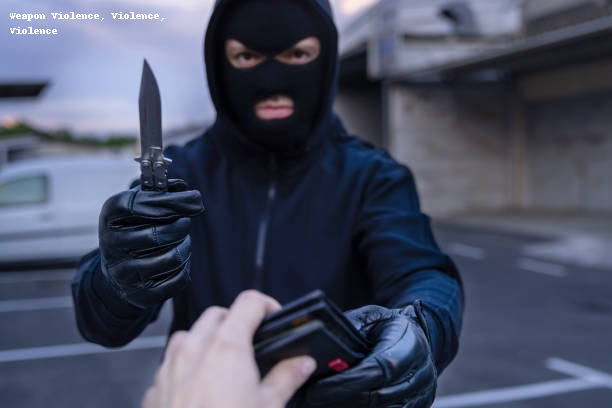

In [105]:
imgWidth, imgHeight = image.size  
draw = ImageDraw.Draw(image)
draw.multiline_text((10, 10), text, font=None, fill=(255,255,255))
image.show()

## Detect Protective Equipment <a id='detect_protective_equipment'></a>
Detecta equipo de protección personal usado por personas en una imagen. Amazon Rekognition detecta los siguientes tipos de protección personal:
* Cobertor facial
* Cobertor de manos
* Cobertor de cabeza

In [109]:
image = Image.open('./img/detect_protective_equipment_1.jpg')
imageBytes1 = io.BytesIO()
image.save(imageBytes1, format='PNG')
imageBytes1 = imageBytes1.getvalue()

In [110]:
response = rekognition.detect_protective_equipment(
    Image={'Bytes': imageBytes1},
    SummarizationAttributes={
        'MinConfidence': 60, 
        'RequiredEquipmentTypes': 
        ['FACE_COVER','HAND_COVER','HEAD_COVER']
    }
)


{
    "BodyParts": [
        {
            "Confidence": 54.963294982910156,
            "EquipmentDetections": [],
            "Name": "FACE"
        },
        {
            "Confidence": 93.61052703857422,
            "EquipmentDetections": [
                {
                    "BoundingBox": {
                        "Height": 0.19614547491073608,
                        "Left": 0.600423276424408,
                        "Top": 0.7199611663818359,
                        "Width": 0.13692893087863922
                    },
                    "Confidence": 99.91487121582031,
                    "CoversBodyPart": {
                        "Confidence": 99.9474868774414,
                        "Value": true
                    },
                    "Type": "HAND_COVER"
                }
            ],
            "Name": "LEFT_HAND"
        },
        {
            "Confidence": 98.21870422363281,
            "EquipmentDetections": [
                {
                    "Bounding

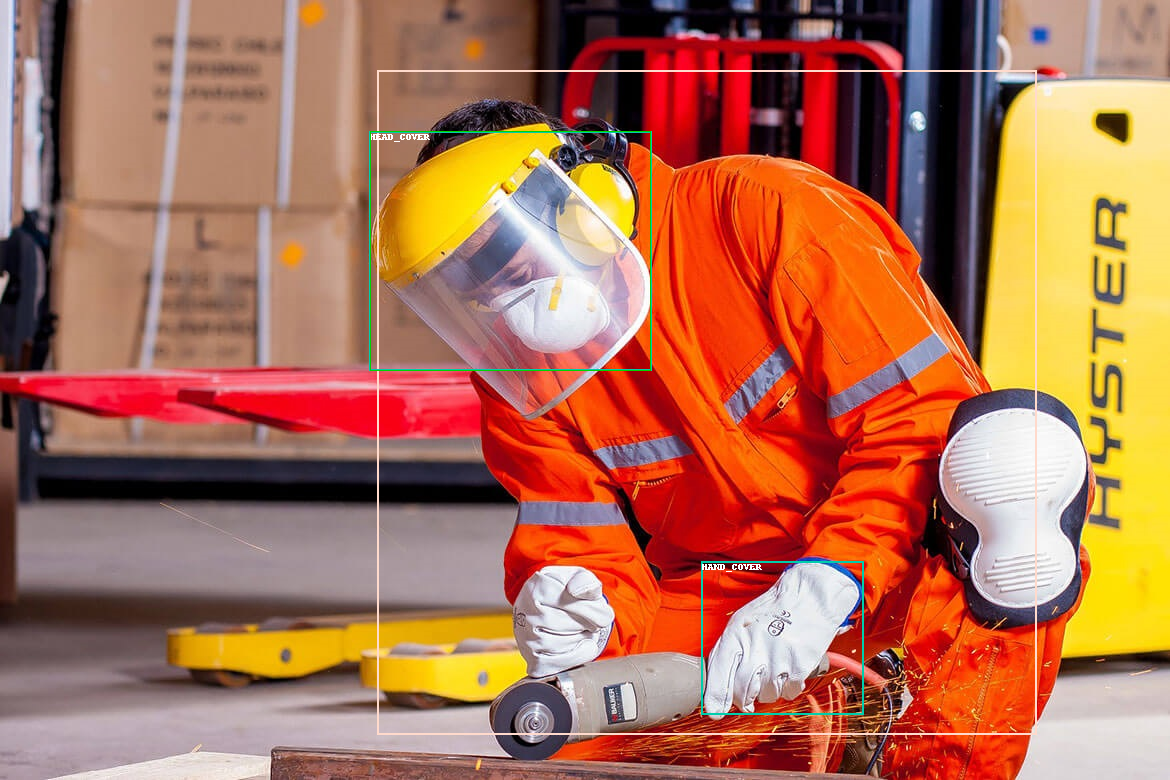

In [112]:
imgWidth, imgHeight = image.size  
draw = ImageDraw.Draw(image)

for person in response['Persons']:

    print(json.dumps(person, indent=4, sort_keys=True))
    box = person['BoundingBox']
    left = imgWidth * box['Left']
    top = imgHeight * box['Top']
    width = imgWidth * box['Width']
    height = imgHeight * box['Height']

    points = (
        (left,top),
        (left + width, top),
        (left + width, top + height),
        (left , top + height),
        (left, top)

    )
    draw.line(points, fill='#ffdacc', width=2)


    for bodyPart in person['BodyParts']:

        for equipmentDetection in bodyPart['EquipmentDetections']:
            box = equipmentDetection['BoundingBox']
            left = imgWidth * box['Left']
            top = imgHeight * box['Top']
            width = imgWidth * box['Width']
            height = imgHeight * box['Height']

            points = (
                (left,top),
                (left + width, top),
                (left + width, top + height),
                (left , top + height),
                (left, top)

            )

            if equipmentDetection['CoversBodyPart']['Value'] == True:
                draw.line(points, fill='#00cdac', width=2)
            else:
                draw.line(points, fill='#ff5768', width=2)
            draw.text((left, top), equipmentDetection['Type'], (255,255,255), font=None)

    draw.rectangle([left,top, left + width, top + height], outline='#00d400') 

image.show()

## Detect Text <a id='detect_text'></a>
Detecta texto en una imagen y lo convierte en texto que puede ser interpretado por una computadora.

In [120]:
with open('./img/detect_text_1.jpeg', 'rb') as document:
    imageBytes1 = bytearray(document.read())

In [121]:
response = rekognition.detect_text(
    Image={'Bytes': imageBytes1},
    Filters={
        'WordFilter': {
            'MinConfidence': 75
        }
    }
)

Detected Text: AUTO
Detected Text: 2018
Detected Text: DEC
Detected Text: California
Detected Text: 6XSU832


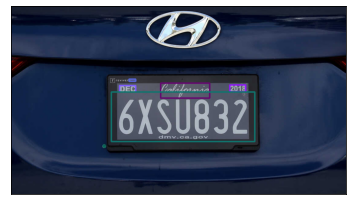

In [124]:
img = cv2.imread('./img/detect_text_1.jpeg',1);
img_color_size = img.shape
font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(0,len(response['TextDetections'])):
    if response['TextDetections'][i]['Type'] == 'LINE':
        boundRect = response['TextDetections'][i]['Geometry']['BoundingBox']
        if(boundRect):
            r,g,b = [int(np.random.uniform(0,255)), int(np.random.uniform(0,255)),int(np.random.uniform(0,255))]
            cv2.rectangle(img,(int(boundRect["Left"]*img_color_size[1]),\
            int((boundRect["Top"]+boundRect["Height"])*img_color_size[0])),\
            (int((boundRect["Left"]+boundRect["Width"])*img_color_size[1]),\
            int((boundRect["Top"]*img_color_size[0]))),(r,g,b),3)
            
            print("Detected Text: {}".format(response['TextDetections'][i]['DetectedText']))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.xticks([]),plt.yticks([])
plt.show();

## Recognize Celebrities <a id='recognize_celebrities'></a>
Retorna un array de celebridades reconocidas en la imagen enviada.

In [125]:
with open('./img/recognize_celebrities_1.jpeg', 'rb') as document:
    imageBytes1 = bytearray(document.read())

In [126]:
response = rekognition.recognize_celebrities(
    Image={'Bytes': imageBytes1},
)

In [127]:
response

{'CelebrityFaces': [{'Urls': ['www.wikidata.org/wiki/Q873',
    'www.imdb.com/name/nm0000658'],
   'Name': 'Meryl Streep',
   'Id': '24Mx5De',
   'Face': {'BoundingBox': {'Width': 0.3237914741039276,
     'Height': 0.4182416498661041,
     'Left': 0.3179081082344055,
     'Top': 0.18094442784786224},
    'Confidence': 99.99718475341797,
    'Landmarks': [{'Type': 'eyeLeft',
      'X': 0.41359442472457886,
      'Y': 0.36481979489326477},
     {'Type': 'mouthRight', 'X': 0.5383074879646301, 'Y': 0.5135985612869263},
     {'Type': 'mouthLeft', 'X': 0.42064279317855835, 'Y': 0.5106754899024963},
     {'Type': 'nose', 'X': 0.47812747955322266, 'Y': 0.44114241003990173},
     {'Type': 'eyeRight', 'X': 0.5548988580703735, 'Y': 0.36843055486679077}],
    'Pose': {'Roll': -0.026692353188991547,
     'Yaw': -1.2286200523376465,
     'Pitch': 9.560462951660156},
    'Quality': {'Brightness': 94.35693359375, 'Sharpness': 92.22801208496094},
    'Emotions': [{'Type': 'HAPPY', 'Confidence': 99.3108

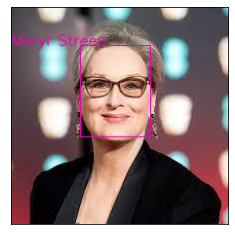

In [147]:
img = cv2.imread('./img/recognize_celebrities_1.jpeg',1);
img_color_size = img.shape
font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(0,len(response['CelebrityFaces'])):
    boundRect = response['CelebrityFaces'][i]['Face']['BoundingBox']
    if(boundRect):
        r,g,b = [int(np.random.uniform(0,255)), int(np.random.uniform(0,255)),int(np.random.uniform(0,255))]
        cv2.rectangle(img,(int(boundRect["Left"]*img_color_size[1]),\
        int((boundRect["Top"]+boundRect["Height"])*img_color_size[0])),\
        (int((boundRect["Left"]+boundRect["Width"])*img_color_size[1]),\
        int((boundRect["Top"]*img_color_size[0]))),(r,g,b),1)

        cv2.putText(img, response['CelebrityFaces'][i]['Name'], (0, int((boundRect["Top"])*img_color_size[0])), font, 0.5, (r,g,b), 1, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.xticks([]),plt.yticks([])
plt.show();

## Index Faces y Search Faces by Image <a id='index_faces'></a>
La operación de *IndexFaces* detecta rostros en una imagen y los añade a la *colección* especificada. Una *colección* es un índice de rostros que el usuario posee y maneja. Amazon Rekognition no almacena los rostros detectados, si no que el algoritmo extrae las características del rostro en un *feature vector* y luego almacena este resultado en una backend database.

La operación de *SearchFacesByImage* detecta el rostro más grande en una imagen, y luego busca rostros que concuerden en la colección especificada.

Así que para hacer un ejercicio de identificación facial se necesita realizar 3 acciones:
* Crear una colección
* Agregar rostros a la colección
* Enviar imágenes para compararla con los rostros en la colección

In [153]:
COLLECTION_NAME = 'sample_notebook_collection'

In [159]:
# Creamos una colección

response = rekognition.create_collection(
    CollectionId=COLLECTION_NAME,
    Tags={
        'Proyecto': 'sample_notebook'
    }
)

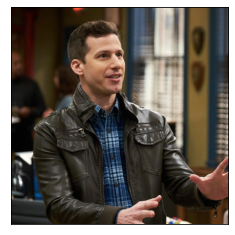

In [150]:
# Agregamos un rostro a la colección

img1 = cv2.imread('./img/index_faces_1.jpg',1);
imgrgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb);
plt.xticks([]),plt.yticks([])
plt.show();

In [160]:
with open('./img/index_faces_1.jpg', 'rb') as document:
    imageBytes1 = bytearray(document.read())

In [161]:
response = rekognition.index_faces(
    CollectionId=COLLECTION_NAME,
    Image={
        'Bytes': imageBytes1,
    },
    DetectionAttributes=[
        'ALL',
    ],
    MaxFaces=1
)

In [162]:
response

{'FaceRecords': [{'Face': {'FaceId': '1ef57469-06eb-4a5a-be87-15a60f44d8c8',
    'BoundingBox': {'Width': 0.18595407903194427,
     'Height': 0.27280306816101074,
     'Left': 0.33754318952560425,
     'Top': 0.12642957270145416},
    'ImageId': 'ee6d3d25-ee44-3a37-b98e-15d71609332e',
    'Confidence': 99.99991607666016},
   'FaceDetail': {'BoundingBox': {'Width': 0.18595407903194427,
     'Height': 0.27280306816101074,
     'Left': 0.33754318952560425,
     'Top': 0.12642957270145416},
    'AgeRange': {'Low': 25, 'High': 35},
    'Smile': {'Value': True, 'Confidence': 94.9417495727539},
    'Eyeglasses': {'Value': False, 'Confidence': 97.66860961914062},
    'Sunglasses': {'Value': False, 'Confidence': 99.99671173095703},
    'Gender': {'Value': 'Male', 'Confidence': 99.45079040527344},
    'Beard': {'Value': False, 'Confidence': 93.955078125},
    'Mustache': {'Value': False, 'Confidence': 98.56700897216797},
    'EyesOpen': {'Value': True, 'Confidence': 98.73485565185547},
    'Mout

FaceId: 1ef57469-06eb-4a5a-be87-15a60f44d8c8


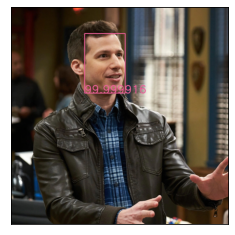

In [167]:
img = cv2.imread('./img/index_faces_1.jpg',1);
img_color_size = img.shape
font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(0,len(response['FaceRecords'])):
    boundRect = response['FaceRecords'][i]['Face']['BoundingBox']
    r,g,b = [int(np.random.uniform(0,255)), int(np.random.uniform(0,255)),int(np.random.uniform(0,255))]
    cv2.rectangle(img,(int(boundRect["Left"]*img_color_size[1]),\
    int((boundRect["Top"]+boundRect["Height"])*img_color_size[0])),\
    (int((boundRect["Left"]+boundRect["Width"])*img_color_size[1]),\
    int((boundRect["Top"]*img_color_size[0]))),(r,g,b),3)
    
    print("FaceId: {}".format(response['FaceRecords'][i]['Face']['FaceId']))

    if i == 0:
        cv2.putText(img, "{:.6f}".format(response['FaceRecords'][i]['Face']['Confidence']), (int((boundRect["Left"])*img_color_size[1]), int((boundRect["Top"]+boundRect["Height"])*img_color_size[0])), font, 2, (r,g,b), 4, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.xticks([]),plt.yticks([])
plt.show();

In [168]:
# Enviamos una imagen para que busque el rostro en la colección
with open('./img/search_faces_by_image_1.jpg', 'rb') as document:
    imageBytes1 = bytearray(document.read())
    
response = rekognition.search_faces_by_image(
    CollectionId=COLLECTION_NAME,
    Image={
        'Bytes': imageBytes1,
    },
    MaxFaces=123,
    FaceMatchThreshold=70
)

In [169]:
response

{'SearchedFaceBoundingBox': {'Width': 0.18400980532169342,
  'Height': 0.46268972754478455,
  'Left': 0.6540743708610535,
  'Top': 0.08390384167432785},
 'SearchedFaceConfidence': 99.99874877929688,
 'FaceMatches': [{'Similarity': 99.99899291992188,
   'Face': {'FaceId': '1ef57469-06eb-4a5a-be87-15a60f44d8c8',
    'BoundingBox': {'Width': 0.1859540045261383,
     'Height': 0.27280300855636597,
     'Left': 0.3375430107116699,
     'Top': 0.12643000483512878},
    'ImageId': 'ee6d3d25-ee44-3a37-b98e-15d71609332e',
    'Confidence': 99.9999008178711,
    'IndexFacesModelVersion': '6.0'}}],
 'FaceModelVersion': '6.0',
 'ResponseMetadata': {'RequestId': '5c9ddfec-0f90-4fe1-9c0e-39956d64ca84',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '5c9ddfec-0f90-4fe1-9c0e-39956d64ca84',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '546',
   'date': 'Fri, 28 Oct 2022 17:53:53 GMT'},
  'RetryAttempts': 0}}

Matched FaceId: 1ef57469-06eb-4a5a-be87-15a60f44d8c8


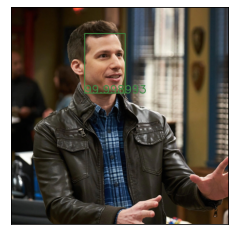

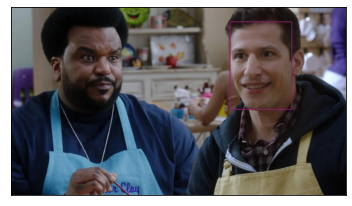

In [174]:
img = cv2.imread('./img/index_faces_1.jpg',1);
img_color_size = img.shape
font = cv2.FONT_HERSHEY_SIMPLEX

img2 = cv2.imread('./img/search_faces_by_image_1.jpg',1);
img_color_size2 = img2.shape

for i in range(0,len(response['FaceMatches'])):
    boundRect = response['FaceMatches'][i]['Face']['BoundingBox']
    r,g,b = [int(np.random.uniform(0,255)), int(np.random.uniform(0,255)),int(np.random.uniform(0,255))]
    cv2.rectangle(img,(int(boundRect["Left"]*img_color_size[1]),\
    int((boundRect["Top"]+boundRect["Height"])*img_color_size[0])),\
    (int((boundRect["Left"]+boundRect["Width"])*img_color_size[1]),\
    int((boundRect["Top"]*img_color_size[0]))),(r,g,b),3)
    
    print("Matched FaceId: {}".format(response['FaceMatches'][i]['Face']['FaceId']))

    cv2.putText(img, "{:.6f}".format(response['FaceMatches'][i]['Similarity']), (int((boundRect["Left"])*img_color_size[1]), int((boundRect["Top"]+boundRect["Height"])*img_color_size[0])), font, 2, (r,g,b), 4, cv2.LINE_AA)

    
# Imagen enviada
boundRect = response['SearchedFaceBoundingBox']
r,g,b = [int(np.random.uniform(0,255)), int(np.random.uniform(0,255)),int(np.random.uniform(0,255))]
cv2.rectangle(img2,(int(boundRect["Left"]*img_color_size2[1]),\
int((boundRect["Top"]+boundRect["Height"])*img_color_size2[0])),\
(int((boundRect["Left"]+boundRect["Width"])*img_color_size2[1]),\
int((boundRect["Top"]*img_color_size2[0]))),(r,g,b),3)
    

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.xticks([]),plt.yticks([])
plt.show();

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB));
plt.xticks([]),plt.yticks([])
plt.show();

En este caso, rekognition nos devuelve que el matched FaceId es el mismo FaceId que obtuvimos al registrar el rostro en la colección con un 99.99899291992188 de similaridad.